In [13]:
# 先看一下資料的大小和長相
import pandas as pd
import numpy as np
name=["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]
train=pd.read_csv('bank-additional-full.csv',header = None, sep=';',names=name)
# adult_test=pd.read_csv('adult_test.csv',header = None)
print("train:", train.shape)
# print("test:", adult_test.shape)
train.head()

train: (41189, 21)


/Users/chessy/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,10,11,12,13,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [14]:
train=train.drop([0])

In [15]:
train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
10,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 21 columns):
age               41188 non-null object
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null object
campaign          41188 non-null object
pdays             41188 non-null object
previous          41188 non-null object
poutcome          41188 non-null object
emp.var.rate      41188 non-null object
cons.price.idx    41188 non-null object
cons.conf.idx     41188 non-null object
euribor3m         41188 non-null object
nr.employed       41188 non-null object
y                 41188 non-null object
dtypes: object(21)
memory usage: 6.9+ MB


In [17]:
import copy
train_nonull=copy.deepcopy(train)
# 把問號換成缺值
train_nonull=train_nonull.replace('unknown',np.nan)
train_nonull=train_nonull.dropna()
train_nonull.shape

(30488, 21)

In [18]:
print("hi")
print(train.columns)

hi
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [19]:
from collections import defaultdict
from operator import itemgetter
def get_freq(feature, number):
    dic = defaultdict(int)
    for l in feature:
#         for word in l:
        dic[l] += 1
#     del dic['empty']
    sorted_dict = sorted(dic.items(), key=itemgetter(1), reverse = True)
    print (len(dic))
    res = []
    for i in sorted_dict[:number]:
        res.append(i[0])
    return res, sorted_dict

In [20]:
for f in train_nonull.columns:
    sel_comp, dic = get_freq(train_nonull[f], 20)
    print ("top 30 frequent "+f, dic[:30])
    print("-------------------------------------------------------------------------")

142
top 30 frequent age [('31', 1322), ('32', 1206), ('33', 1167), ('36', 1138), ('30', 1136), ('35', 1122), ('34', 1106), ('37', 912), ('29', 904), ('39', 873), ('38', 837), ('41', 754), ('40', 693), ('42', 665), ('43', 612), ('44', 560), ('45', 553), ('48', 552), ('46', 546), ('28', 535), ('47', 508), ('50', 471), ('27', 432), ('49', 428), ('52', 412), ('26', 381), ('53', 370), ('51', 363), (29, 359), (33, 357)]
-------------------------------------------------------------------------
11
top 30 frequent job [('admin.', 8737), ('blue-collar', 5675), ('technician', 5473), ('services', 2857), ('management', 2311), ('retired', 1216), ('self-employed', 1092), ('entrepreneur', 1089), ('unemployed', 738), ('housemaid', 690), ('student', 610)]
-------------------------------------------------------------------------
3
top 30 frequent marital [('married', 17492), ('single', 9443), ('divorced', 3553)]
-------------------------------------------------------------------------
7
top 30 frequent e

In [21]:
import pandas as pd
import copy
dummy=['job','marital', 'education','month','day_of_week','poutcome']
for d in dummy:
    # train['num_edu'] = train['education'].apply(lambda x: len(x) if x != {} else 0)
    sel_comp, dic = get_freq(train_nonull[d], 20)
    print ("top 30 frequent "+d, dic[:30])
    print("-------------------------------------------------------------------------")
    for g in sel_comp:
        train_nonull[d + '_' + g] = train_nonull[d].apply(lambda x: 1 if g in x else 0)
    train_nonull=train_nonull.drop(d,axis=1)

11
top 30 frequent job [('admin.', 8737), ('blue-collar', 5675), ('technician', 5473), ('services', 2857), ('management', 2311), ('retired', 1216), ('self-employed', 1092), ('entrepreneur', 1089), ('unemployed', 738), ('housemaid', 690), ('student', 610)]
-------------------------------------------------------------------------
3
top 30 frequent marital [('married', 17492), ('single', 9443), ('divorced', 3553)]
-------------------------------------------------------------------------
7
top 30 frequent education [('university.degree', 10412), ('high.school', 7699), ('professional.course', 4321), ('basic.9y', 4276), ('basic.4y', 2380), ('basic.6y', 1389), ('illiterate', 11)]
-------------------------------------------------------------------------
10
top 30 frequent month [('may', 9733), ('jul', 5081), ('aug', 4673), ('jun', 3614), ('nov', 3496), ('apr', 2115), ('oct', 642), ('sep', 495), ('mar', 482), ('dec', 157)]
------------------------------------------------------------------------

In [22]:
print(train_nonull.columns)
train_nonull.head(10)

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_technician', 'job_services', 'job_management', 'job_retired',
       'job_self-employed', 'job_entrepreneur', 'job_unemployed',
       'job_housemaid', 'job_student', 'marital_married', 'marital_single',
       'marital_divorced', 'education_university.degree',
       'education_high.school', 'education_professional.course',
       'education_basic.9y', 'education_basic.4y', 'education_basic.6y',
       'education_illiterate', 'month_may', 'month_jul', 'month_aug',
       'month_jun', 'month_nov', 'month_apr', 'month_oct', 'month_sep',
       'month_mar', 'month_dec', 'day_of_week_thu', 'day_of_week_mon',
       'day_of_week_wed', 'day_of_week_tue', 'day_of_week_fri',
       'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success'],
      dt

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
1,56,no,no,no,telephone,261,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
3,37,no,yes,no,telephone,226,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
4,40,no,no,no,telephone,151,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
5,56,no,no,yes,telephone,307,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
7,59,no,no,no,telephone,139,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
9,24,no,yes,no,telephone,380,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
10,25,no,yes,no,telephone,50,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
12,25,no,yes,no,telephone,222,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
13,29,no,no,yes,telephone,137,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
14,57,no,yes,no,telephone,293,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0


In [23]:
train_nonull=train_nonull.replace('yes',1)
train_nonull=train_nonull.replace('no',0)
train_nonull=train_nonull.replace('telephone',1)
train_nonull=train_nonull.replace('cellular',0)

In [24]:
print(train_nonull.columns)
train_nonull.head(10)

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_technician', 'job_services', 'job_management', 'job_retired',
       'job_self-employed', 'job_entrepreneur', 'job_unemployed',
       'job_housemaid', 'job_student', 'marital_married', 'marital_single',
       'marital_divorced', 'education_university.degree',
       'education_high.school', 'education_professional.course',
       'education_basic.9y', 'education_basic.4y', 'education_basic.6y',
       'education_illiterate', 'month_may', 'month_jul', 'month_aug',
       'month_jun', 'month_nov', 'month_apr', 'month_oct', 'month_sep',
       'month_mar', 'month_dec', 'day_of_week_thu', 'day_of_week_mon',
       'day_of_week_wed', 'day_of_week_tue', 'day_of_week_fri',
       'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success'],
      dt

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
1,56,0,0,0,1,261,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
3,37,0,1,0,1,226,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
4,40,0,0,0,1,151,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
5,56,0,0,1,1,307,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
7,59,0,0,0,1,139,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
9,24,0,1,0,1,380,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
10,25,0,1,0,1,50,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
12,25,0,1,0,1,222,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
13,29,0,0,1,1,137,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
14,57,0,1,0,1,293,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0


In [86]:
train_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 1 to 41188
Data columns (total 54 columns):
age                              30488 non-null object
default                          30488 non-null int64
housing                          30488 non-null int64
loan                             30488 non-null int64
contact                          30488 non-null int64
duration                         30488 non-null object
campaign                         30488 non-null object
pdays                            30488 non-null object
previous                         30488 non-null object
emp.var.rate                     30488 non-null object
cons.price.idx                   30488 non-null object
cons.conf.idx                    30488 non-null object
euribor3m                        30488 non-null object
nr.employed                      30488 non-null object
y                                30488 non-null int64
job_admin.                       30488 non-null int64
job_blue-collar  

In [31]:
# train_nonull=train_nonull.drop(['edu_unknown','job_unknown','marital_unknown','education_unknown','poutcome_nonexistent'],axis=1)
# print(train_nonull.columns)
# train_nonull.head(10)
X_train=train_nonull.drop('y', axis=1)
Y_train=train_nonull['y']
print(X_train.shape)
print(Y_train.shape)

(30488, 53)
(30488,)


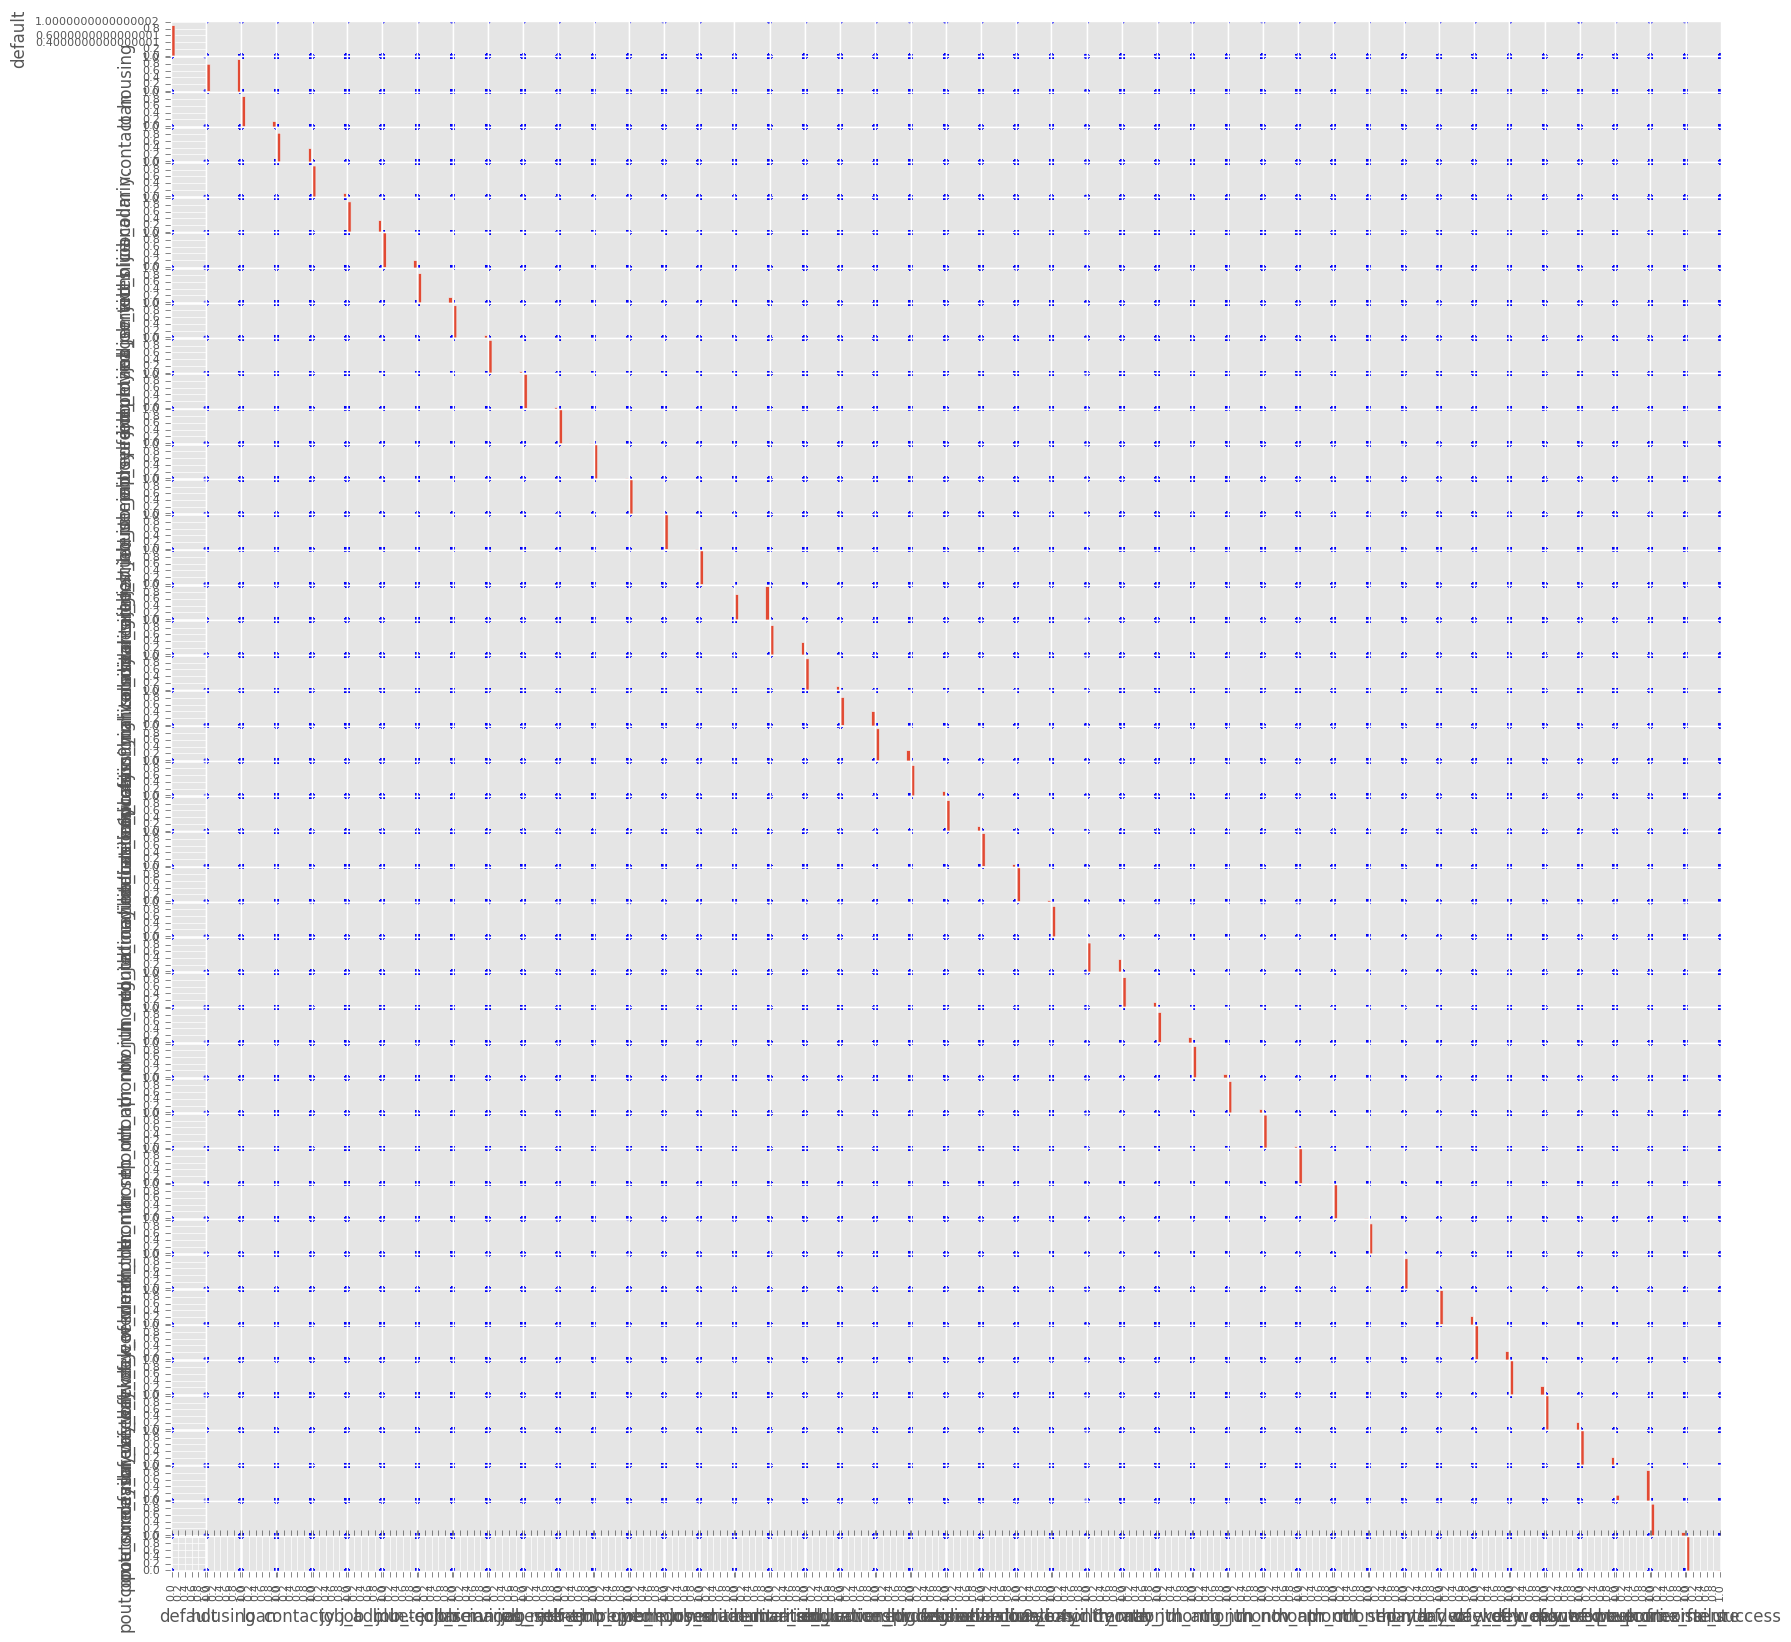

In [84]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# t = pd.DataFrame(train_nonull, columns = ['age','pdays', 'duration', 'campaign','cons.conf.idx','euribor3m','nr.employed','y'])
# attributes=['age','pdays', 'duration', 'campaign','cons.conf.idx','euribor3m','nr.employed','y']
# data2 = {'A': ['a', 'b', 'c', 'd', 'e', 'f'],'E': [42, 52, 31, 2, 62, 70]}
# df2 = pd.DataFrame(data2, columns = ['A', 'E'])
attributes=train_nonull.columns.values
scatter_matrix(train_nonull[attributes[:]], figsize = (20, 20))
plt.show()

In [85]:
attributes=train_nonull.columns.values
print(train_nonull[attributes[:]])

      age  default  housing  loan  contact duration campaign pdays previous  \
1      56        0        0     0        1      261        1   999        0   
3      37        0        1     0        1      226        1   999        0   
4      40        0        0     0        1      151        1   999        0   
5      56        0        0     1        1      307        1   999        0   
7      59        0        0     0        1      139        1   999        0   
9      24        0        1     0        1      380        1   999        0   
10     25        0        1     0        1       50        1   999        0   
12     25        0        1     0        1      222        1   999        0   
13     29        0        0     1        1      137        1   999        0   
14     57        0        1     0        1      293        1   999        0   
15     35        0        1     0        1      146        1   999        0   
17     35        0        1     0        1      312 

# Random Forest Feature Selection

In [33]:
#以training data選擇降維維度
#Random Forest建模
#最多10棵樹，樹最深10層
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, random_state=1, max_depth=10)
RF.fit(X_train, Y_train)
#以SelectFromModel選擇feature
from sklearn.feature_selection import SelectFromModel
SFM = SelectFromModel(RF, prefit=True)
X_reduced = SFM.transform(X_train)

#印出所選feature欄位名
features_list = list(X_train.columns)
feature_select = SFM.get_support()
print('Feature Selected:')
for i in range(0,len(features_list)):
    if feature_select[i]:
        print(features_list[i])

Feature Selected:
age
duration
campaign
pdays
cons.conf.idx
euribor3m
nr.employed


In [34]:
#特徵重要性
importances_list = list(RF.feature_importances_)
feature_importances = [(feature, round(importance, 2)) 
                       for feature, importance in zip(features_list, importances_list)] 
#重要性從高到低排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#印出特徵與重要性
for pair in feature_importances:
    print('Feature: {:30} Importance: {}'.format(*pair))

Feature: duration                       Importance: 0.4
Feature: nr.employed                    Importance: 0.24
Feature: euribor3m                      Importance: 0.07
Feature: age                            Importance: 0.05
Feature: pdays                          Importance: 0.03
Feature: cons.conf.idx                  Importance: 0.03
Feature: campaign                       Importance: 0.02
Feature: loan                           Importance: 0.01
Feature: contact                        Importance: 0.01
Feature: previous                       Importance: 0.01
Feature: cons.price.idx                 Importance: 0.01
Feature: job_technician                 Importance: 0.01
Feature: education_university.degree    Importance: 0.01
Feature: month_oct                      Importance: 0.01
Feature: day_of_week_wed                Importance: 0.01
Feature: day_of_week_tue                Importance: 0.01
Feature: poutcome_success               Importance: 0.01
Feature: default                

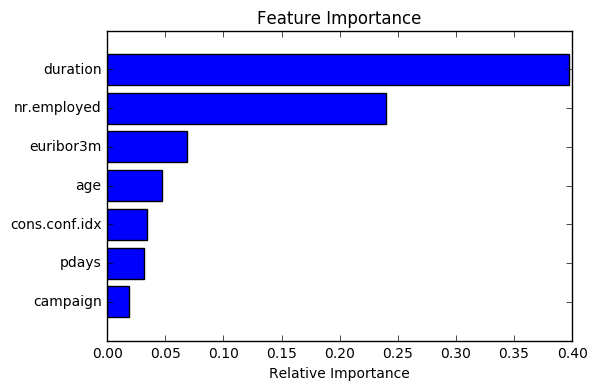

In [36]:
#特徵重要性視覺化
import numpy as np
import matplotlib.pyplot as plt
importances = RF.feature_importances_
#印出所選feature重要性（最高7個）
#重要性由高到低排序
indices = np.argsort(importances)[-7:]
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# PCA Feature Selection

(30488, 53)


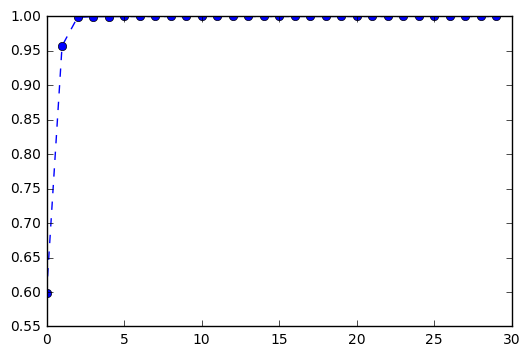

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 把所有的feature都放進去
# 看保留幾個解釋力進步最多的feature
from sklearn import preprocessing
print(X_train.shape)
estimator = PCA(n_components=30)
pca_x_train = estimator.fit_transform(X_train)
plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
plt.show()

          0
0  0.598486
1  0.358738
2  0.041544
3  0.000930


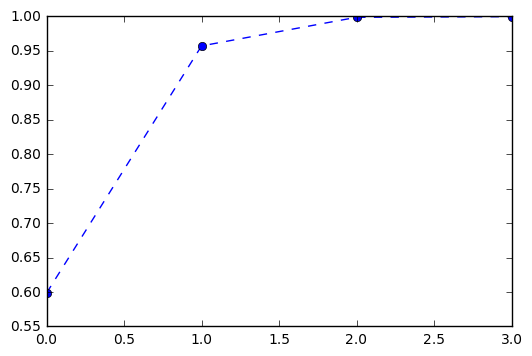

In [41]:
# 決定降維成4
# 印出feture相對解釋力每個feature相對原本feature的組成
# 把test資料也降維
import pandas as pd
from sklearn import preprocessing
estimator = PCA(n_components=4)
pca_x_train = estimator.fit_transform(X_train)
print(pd.DataFrame(estimator.explained_variance_ratio_))
plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
plt.show()
# data_scaled = pd.DataFrame(preprocessing.scale(X_train),columns = X_train.columns) 
# print(pd.DataFrame(estimator.components_,columns=data_scaled.columns,index = ['feature-1','feature-2','feature-3','feature-4']))
# pca_X_test = estimator.transform(X_test)

In [42]:
def nmf(x,k):
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=k).fit(x)
    w = nmf.fit_transform(x)
    return w

In [46]:
print(type(train_nonull['age'].iloc[0]))
print(type(train_nonull['age'].iloc[-1]))
print(train_nonull['age'].values)

<class 'str'>
<class 'int'>
['56' '37' '40' ... 56 44 74]


# 下面不要看

In [26]:
import pandas as pd
import copy
XY=copy.deepcopy(train)
dummy=['job','marital', 'education','month','day_of_week','poutcome']
for d in dummy:
    # train['num_edu'] = train['education'].apply(lambda x: len(x) if x != {} else 0)
    sel_comp, dic = get_freq(XY[d], 20)
    print ("top 30 frequent "+d, dic[:30])
    print("-------------------------------------------------------------------------")
    for g in sel_comp:
        XY[d + '_' + g] = XY[d].apply(lambda x: 1 if g in x else 0)
    XY=XY.drop(d,axis=1)

12
top 30 frequent job [('admin.', 10422), ('blue-collar', 9254), ('technician', 6743), ('services', 3969), ('management', 2924), ('retired', 1720), ('entrepreneur', 1456), ('self-employed', 1421), ('housemaid', 1060), ('unemployed', 1014), ('student', 875), ('unknown', 330)]
-------------------------------------------------------------------------
4
top 30 frequent marital [('married', 24928), ('single', 11568), ('divorced', 4612), ('unknown', 80)]
-------------------------------------------------------------------------
8
top 30 frequent education [('university.degree', 12168), ('high.school', 9515), ('basic.9y', 6045), ('professional.course', 5243), ('basic.4y', 4176), ('basic.6y', 2292), ('unknown', 1731), ('illiterate', 18)]
-------------------------------------------------------------------------
10
top 30 frequent month [('may', 13769), ('jul', 7174), ('aug', 6178), ('jun', 5318), ('nov', 4101), ('apr', 2632), ('oct', 718), ('sep', 570), ('mar', 546), ('dec', 182)]
-------------

In [31]:
print(XY.columns)
XY.head(10)

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'edu_university.degree',
       'edu_high.school', 'edu_basic.9y', 'edu_professional.course',
       'edu_basic.4y', 'edu_basic.6y', 'edu_unknown', 'edu_illiterate',
       'job_admin.', 'job_blue-collar', 'job_technician', 'job_services',
       'job_management', 'job_retired', 'job_entrepreneur',
       'job_self-employed', 'job_housemaid', 'job_unemployed', 'job_student',
       'job_unknown', 'marital_married', 'marital_single', 'marital_divorced',
       'marital_unknown', 'education_university.degree',
       'education_high.school', 'education_basic.9y',
       'education_professional.course', 'education_basic.4y',
       'education_basic.6y', 'education_unknown', 'education_illiterate',
       'month_may', 'month_jul', 'month_aug', 'month_jun', 'month_nov',
       'month_apr', 'month

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
1,56,no,no,no,telephone,261,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
2,57,unknown,no,no,telephone,149,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
3,37,no,yes,no,telephone,226,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
4,40,no,no,no,telephone,151,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
5,56,no,no,yes,telephone,307,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
6,45,unknown,no,no,telephone,198,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
7,59,no,no,no,telephone,139,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
8,41,unknown,no,no,telephone,217,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
9,24,no,yes,no,telephone,380,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
10,25,no,yes,no,telephone,50,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0


In [32]:
import pandas as pd
# train["education"] = get_data_from_dict(train, "education", "name")
# train['num_edu'] = train['education'].apply(lambda x: len(x) if x != {} else 0)
# test["production_companies"] = get_data_from_dict(test, "education", "name")
# test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
sel_comp, dic = get_freq(train["education"], 20)
print ("top 30 frequent education:", dic[:30])
for g in sel_comp:
    train['edu_' + g] = train['education'].apply(lambda x: 1 if g in x else 0)
#     test['education' + g] = test['education'].apply(lambda x: 1 if g in x else 0)

8
top 30 frequent education: [('university.degree', 12168), ('high.school', 9515), ('basic.9y', 6045), ('professional.course', 5243), ('basic.4y', 4176), ('basic.6y', 2292), ('unknown', 1731), ('illiterate', 18)]


In [37]:
XY=XY.replace('yes',1)
XY=XY.replace('no',0)
XY=XY.replace('unknown',np.nan)
XY=XY.replace('telephone',1)
XY=XY.replace('cellular',0)

In [38]:
print(XY.columns)
XY.head(10)

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'edu_university.degree',
       'edu_high.school', 'edu_basic.9y', 'edu_professional.course',
       'edu_basic.4y', 'edu_basic.6y', 'edu_unknown', 'edu_illiterate',
       'job_admin.', 'job_blue-collar', 'job_technician', 'job_services',
       'job_management', 'job_retired', 'job_entrepreneur',
       'job_self-employed', 'job_housemaid', 'job_unemployed', 'job_student',
       'job_unknown', 'marital_married', 'marital_single', 'marital_divorced',
       'marital_unknown', 'education_university.degree',
       'education_high.school', 'education_basic.9y',
       'education_professional.course', 'education_basic.4y',
       'education_basic.6y', 'education_unknown', 'education_illiterate',
       'month_may', 'month_jul', 'month_aug', 'month_jun', 'month_nov',
       'month_apr', 'month

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
1,56,0.0,0.0,0.0,1,261,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
2,57,NaN,0.0,0.0,1,149,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
3,37,0.0,1.0,0.0,1,226,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
4,40,0.0,0.0,0.0,1,151,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
5,56,0.0,0.0,1.0,1,307,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
6,45,NaN,0.0,0.0,1,198,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
7,59,0.0,0.0,0.0,1,139,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
8,41,NaN,0.0,0.0,1,217,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
9,24,0.0,1.0,0.0,1,380,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
10,25,0.0,1.0,0.0,1,50,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0


In [39]:
XY=XY.drop(['edu_unknown','job_unknown','marital_unknown','education_unknown','poutcome_nonexistent'],axis=1)
print(XY.columns)
XY.head(10)

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'edu_university.degree',
       'edu_high.school', 'edu_basic.9y', 'edu_professional.course',
       'edu_basic.4y', 'edu_basic.6y', 'edu_illiterate', 'job_admin.',
       'job_blue-collar', 'job_technician', 'job_services', 'job_management',
       'job_retired', 'job_entrepreneur', 'job_self-employed', 'job_housemaid',
       'job_unemployed', 'job_student', 'marital_married', 'marital_single',
       'marital_divorced', 'education_university.degree',
       'education_high.school', 'education_basic.9y',
       'education_professional.course', 'education_basic.4y',
       'education_basic.6y', 'education_illiterate', 'month_may', 'month_jul',
       'month_aug', 'month_jun', 'month_nov', 'month_apr', 'month_oct',
       'month_sep', 'month_mar', 'month_dec', 'day_of_week_thu',
       'day_

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_sep,month_mar,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_failure,poutcome_success
1,56,0.0,0.0,0.0,1,261,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
2,57,NaN,0.0,0.0,1,149,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
3,37,0.0,1.0,0.0,1,226,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
4,40,0.0,0.0,0.0,1,151,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
5,56,0.0,0.0,1.0,1,307,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
6,45,NaN,0.0,0.0,1,198,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
7,59,0.0,0.0,0.0,1,139,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
8,41,NaN,0.0,0.0,1,217,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
9,24,0.0,1.0,0.0,1,380,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0
10,25,0.0,1.0,0.0,1,50,1,999,0,1.1,...,0,0,0,0,1,0,0,0,0,0


In [46]:
print(XY.iloc[0])

age                                  56
default                               0
housing                               0
loan                                  0
contact                               1
duration                            261
campaign                              1
pdays                               999
previous                              0
emp.var.rate                        1.1
cons.price.idx                   93.994
cons.conf.idx                     -36.4
euribor3m                         4.857
nr.employed                        5191
y                                     0
edu_university.degree                 0
edu_high.school                       0
edu_basic.9y                          0
edu_professional.course               0
edu_basic.4y                          1
edu_basic.6y                          0
edu_illiterate                        0
job_admin.                            0
job_blue-collar                       0
job_technician                        0
